### Tensorflow Application
Neural networks (single layer)

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:
$$ f = c \times 1.8 + 32 $$

It is a linear equation, and if we give several sample Celsius values (0, 7, 15, 22, 30, 37, 50, 56), we will have their corresponding Fahrenheit values:

In [5]:
c = np.array([-10, 0, 7, 15, 22, 30, 37, 45, 50, 56])
def trans(c):
    return 1.8 * c + 32

f = trans(c)
f

array([ 14. ,  32. ,  44.6,  59. ,  71.6,  86. ,  98.6, 113. , 122. ,
       132.8])

Therefore,

In [6]:
cel = np.array([-10, 0, 7, 15, 22, 30, 37, 45, 50, 56], dtype = float)
fah = np.array([14. ,  32. ,  44.6,  59. ,  71.6,  86. ,  98.6, 113. , 122. , 132.8], dtype = float)

for i, ch in enumerate(cel):
    print('{} degrees Celsius = {} degrees Fahrenheit'.format(ch, fah[i]))

-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
7.0 degrees Celsius = 44.6 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 71.6 degrees Fahrenheit
30.0 degrees Celsius = 86.0 degrees Fahrenheit
37.0 degrees Celsius = 98.6 degrees Fahrenheit
45.0 degrees Celsius = 113.0 degrees Fahrenheit
50.0 degrees Celsius = 122.0 degrees Fahrenheit
56.0 degrees Celsius = 132.8 degrees Fahrenheit


#### Model
Bulid a layer

In [7]:
L = tf.keras.layers.Dense(units = 1, input_shape = [1])
md = tf.keras.Sequential([L])

Compile

In [8]:
md.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

In [11]:
history = md.fit(cel, fah, epochs = 500, verbose = False)

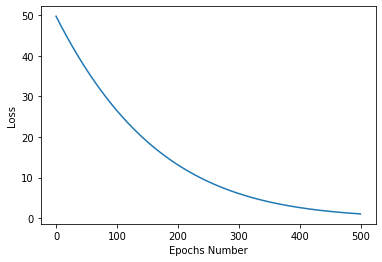

In [13]:
plt.xlabel('Epochs Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.show()

In [14]:
print(md.predict([100.0]))
print()
print(100 * 1.8 + 32)

[[214.13525]]

212.0


In [15]:
print('Layer variables: {}'.format(L.get_weights()))

Layer variables: [array([[1.8370513]], dtype=float32), array([30.430138], dtype=float32)]


See what happens if more layers added

In [16]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

In [17]:
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

In [18]:
model.fit(cel, fah, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [20]:
print(model.predict([100.0]))
print()
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print()
print("These are the l0 variables: {}".format(l0.get_weights()))
print()
print("These are the l1 variables: {}".format(l1.get_weights()))

[[212.]]

Model predicts that 100 degrees Celsius is: [[212.]] degrees Fahrenheit

These are the l0 variables: [array([[ 0.0678059 ,  0.80825037, -0.03938409, -0.40411124]],
      dtype=float32), array([-2.393457 ,  4.1098847,  3.0218163, -3.8742316], dtype=float32)]

These are the l1 variables: [array([[ 0.23563014, -0.2840252 , -0.6102679 ,  0.80308396],
       [ 0.98958135,  1.1628568 , -0.10822053, -0.1444563 ],
       [-0.0774582 ,  0.74643004,  1.0272686 ,  0.07910588],
       [-0.00657866, -0.5519344 , -1.0789133 ,  0.6201299 ]],
      dtype=float32), array([-0.73684156,  3.570752  ,  4.337703  , -0.8585809 ], dtype=float32)]


See that the result is accurate according to the formula, but added layers hides the simple form of the conversion equation.